<a href="https://colab.research.google.com/github/FelipeMu/memoria2024-testing/blob/main/test1_signalsv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lectura de archivo
 Se procede a leer el archivo con extensión '.csv' - señal de PAM y VFSC (sujeto G1)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import csv
import numpy as np

# Arreglo para almcenar los datos de las senales
G1_PAM = [] # PAM: Presión Arterial Media
G1_VSC = [] # VSC: Velocidad Sanguínea Cerebral

# Abre el archivo CSV en modo lectura
with open('/content/drive/MyDrive/Trabajo de titulación/Lectura y T.Wavelet/G2_001.csv', newline='') as csvfile:
    # Lee el archivo CSV usando el lector CSV
    csv_reader = csv.reader(csvfile)

    # Itera sobre cada fila en el archivo CSV
    for row in csv_reader:
        # Cada fila se convierte en una lista de valores, donde cada valor representa una celda en esa fila
        G1_PAM.append(row[0])
        G1_VSC.append(row[1])
#Se elimina los nombre de las filas PAM y VFSC que estaban contenidas dentro de los arreglos
del G1_PAM[0]
del G1_VSC[0]

# Verificar arreglos de la señal G1 (PAM y VSC)
print(G1_PAM)
print(G1_VSC)

G1_PAM = np.array(G1_PAM)
G1_PAM = G1_PAM.astype(np.float64)
print(type(G1_PAM))
print(G1_PAM)

['126.63', '124.02', '121.81', '119.98', '118.47', '117.26', '116.30', '115.55', '114.99', '114.57', '114.15', '113.80', '113.53', '113.35', '113.23', '113.05', '113.00', '113.13', '113.52', '114.43', '115.50', '116.66', '117.80', '118.86', '119.75', '120.40', '120.44', '120.20', '119.75', '119.20', '118.64', '118.06', '117.49', '116.96', '116.70', '116.52', '116.38', '116.27', '116.09', '115.80', '115.52', '115.30', '115.16', '115.22', '115.39', '115.62', '115.90', '116.35', '116.76', '117.04', '117.07', '116.40', '115.56', '114.65', '113.79', '113.50', '113.34', '113.29', '113.30', '113.30', '113.16', '113.05', '113.01', '113.05', '113.23', '113.54', '113.96', '114.51', '115.40', '116.48', '117.44', '118.15', '117.91', '117.25', '116.43', '115.60', '115.53', '115.62', '115.81', '116.03', '116.18', '116.02', '115.83', '115.64', '115.49', '115.51', '115.67', '115.85', '116.02', '116.09', '116.06', '115.97', '115.85', '115.68', '115.48', '115.27', '115.06', '114.87', '114.78', '114.70',

# Preprocesamiento
Se analizan los datos del archivo '.csv' antes de los respectivos análisis

In [3]:
# Se procede a realizar preprocesamiento de los datos a estudiar

# Se analizan si tienen el mismo largo ambos arreglos de la senal G1
len_distinto = False
if len(G1_PAM) != len(G1_VSC):
  len_distinto = True
  print('Arreglos PAM y VSC con distinto largo.\n')


# Verificacion de valores nulos:
i = 0
vacios_PAM = 0
vacios_VSC = 0
while (i < len(G1_PAM)):
  if G1_PAM[i] == '':
    vacios_PAM = vacios_PAM + 1
  if G1_VSC[i] == '':
    vacios_VSC = vacios_VSC + 1
  i = i + 1
# Revision de valores nulos en el arreglo de la senal PAM
if vacios_PAM != 0:
  print('Arreglo señal PAM con ', vacios_PAM, 'vacíos.\n')
# Revision de valores nulos en el arreglo de la senal VSC
if vacios_VSC != 0:
  print('Arreglo señal VSC con ', vacios_VSC, 'vacíos.\n')


# Aplicación de la transformada Wavelet
**¿Que realiza la T.Wavelet?**
La transformación de la WT se realiza a través de una función llamada wavelet (o wavelet madre), con la que se descompone una señal en diferentes componentes de frecuencia que conforman una familia de funciones que son traslaciones y dilataciones de una función madre ψ (t). Este proceso de traslación y dilatación.



Se estudia cúal de las familias de la T.Wavelets (Wavelets families) es la que genera menor error al aplicar su T. wavelet inversa
inf: https://pywavelets.readthedocs.io/en/latest/regression/wavelet.html

**Información de las familias de Wavelets**
La calidad de la información obtenida a partir de un análisis donde se aplica la WT depende en gran medida de la wavelet madre utilizada, de modo que se debe considerar como una "*etapa dentro del análisis*" la selección de una wavelet madre adecuada para cada caso particular de estudio (Gómez etc al., 2013)

**Dado la naturaleza de los datos es utilizará la CWN (Continuous Wavelet Transform).**

**A considerar:**


1.   Longitud de los filtros (Capacidad de capturar detalles finos vs Complejidad computacional)



In [4]:
!pip install --upgrade pywavelets


In [5]:
# Familias de Wavelets mas utilizadas comunmente: NO FUNCIONA ***
import pywt
import numpy as np
import matplotlib.pyplot as plt


pywt.families()

# Obtener una lista completa de cada familia Wavelets
for family in pywt.families():
    print("%s family: " % family + ', '.join(pywt.wavelist(family)))



###########################################
##### Creación del un objeto Wavelet ######
###########################################

# Probando...

import numpy as np
import pywt
import matplotlib.pyplot as plt

# Familias de wavelets disponibles
#wavelet_families = ['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']
wavelet_families = ['mexh', 'morl']

# Diccionario para almacenar los errores de cada wavelet
wavelet_errors = {}

# Calcular el error para cada wavelet
for wavelet_family in wavelet_families:
    print(wavelet_family)
    # Aplicar la transformada de wavelet con la familia actual
    coefficients, frequencies = pywt.cwt(G1_PAM, np.arange(1, 128), wavelet_family)

    # Reconstruir la señal a partir de los coeficientes
    reconstructed_signal = pywt.icwt(coefficients, wavelet_family, frequencies)

    # Calcular el error entre la señal original y la reconstruida
    error = np.mean(np.abs(G1_PAM - reconstructed_signal))

    # Almacenar el error en el diccionario
    wavelet_errors[wavelet_family] = error

# Encontrar la wavelet con el menor error
best_wavelet = min(wavelet_errors, key=wavelet_errors.get)
min_error = wavelet_errors[best_wavelet]

# Mostrar resultados
print("La wavelet con el menor error es:", best_wavelet)
print("El error mínimo es:", min_error)

# Graficar los errores de cada wavelet
plt.bar(wavelet_errors.keys(), wavelet_errors.values())
plt.xlabel('Wavelet')
plt.ylabel('Error')
plt.title('Errores de Reconstrucción para Diferentes Wavelets')
plt.xticks(rotation=45, ha='right')
plt.show()



haar family: haar
db family: db1, db2, db3, db4, db5, db6, db7, db8, db9, db10, db11, db12, db13, db14, db15, db16, db17, db18, db19, db20, db21, db22, db23, db24, db25, db26, db27, db28, db29, db30, db31, db32, db33, db34, db35, db36, db37, db38
sym family: sym2, sym3, sym4, sym5, sym6, sym7, sym8, sym9, sym10, sym11, sym12, sym13, sym14, sym15, sym16, sym17, sym18, sym19, sym20
coif family: coif1, coif2, coif3, coif4, coif5, coif6, coif7, coif8, coif9, coif10, coif11, coif12, coif13, coif14, coif15, coif16, coif17
bior family: bior1.1, bior1.3, bior1.5, bior2.2, bior2.4, bior2.6, bior2.8, bior3.1, bior3.3, bior3.5, bior3.7, bior3.9, bior4.4, bior5.5, bior6.8
rbio family: rbio1.1, rbio1.3, rbio1.5, rbio2.2, rbio2.4, rbio2.6, rbio2.8, rbio3.1, rbio3.3, rbio3.5, rbio3.7, rbio3.9, rbio4.4, rbio5.5, rbio6.8
dmey family: dmey
gaus family: gaus1, gaus2, gaus3, gaus4, gaus5, gaus6, gaus7, gaus8
mexh family: mexh
morl family: morl
cgau family: cgau1, cgau2, cgau3, cgau4, cgau5, cgau6, cgau7, 

**A considerar:**
1.   plt.imshow() se utiliza para mostrar la matriz de coeficientes de la CWT como *una imagen*.
2.   La función np.abs() se usa para tomar el valor absoluto de los coeficientes para la visualización.
3.   El argumento cmap='jet' define el mapa de colores que se utilizará para representar la amplitud de los coeficientes.
4.  **Al no tener definida una función de escala, una wavelet determinada no puede ser utilizada en la aplicación de la DWT**

    *   wavelets madres que tienen una función escala definida y por lo tanto es aplicable la "DWT":


1.   Haar (harr)
2.   Daubechies (db)
3.   Symmlets (symN)
4.   Coiflets (coifN)
5.   Biorthogonal (BiorNr.Nd)
6.   Reverse Biorthogonal (rBiorNR.Nd)
7.   Discrete Meyer (dmey)






6.   **coef_approx:** Estos coeficientes capturan las tendencias generales y las componentes de baja frecuencia de la señal.
6.   **coef_details:** Estos coeficientes capturan cambios rápidos o detalles finos en la señal que pueden perderse en la aproximación

(por cada nivel de descomposición se genera un conjunto de coeficientes de aproximación y detalles)

**Desvanecimiento y tamaño de soporte:**
 La propiedad de desvanecimiento dicta que a medida que la frecuencia de una wavelet aumenta, su amplitud disminuye. Esta propiedad está estrechamente relacionada con el soporte de la wavelet. Cuanto más corto sea el soporte de una wavelet en el dominio del tiempo, mayor será su ancho de banda en el dominio de la frecuencia, lo que significa que cubrirá un rango más amplio de frecuencias.

[126.63 124.02 121.81 ... 113.27 113.07 113.23]
[array([167.54542002, 172.28917227, 179.08099983, 175.37631864,
       169.66732701, 165.82765274, 163.42405827, 162.00871864,
       160.92466318, 160.32808674, 159.88149   , 159.92813392,
       161.84944389, 164.99674789, 168.13908763, 170.2038861 ,
       169.95884467, 168.57651104, 166.93744992, 165.44768676,
       164.78256992, 164.44053339, 163.76032513, 163.0250609 ,
       162.96693987, 163.48459312, 164.53834529, 165.62563122,
       164.6189003 , 162.01183836, 160.50981186, 160.24405107,
       160.19075381, 159.8728469 , 159.88322733, 160.55839505,
       161.96825908, 164.80167   , 166.98325044, 165.73444625,
       163.61818579, 163.51332262, 164.14856112, 164.07837629,
       163.50102627, 163.37833857, 163.86193203, 164.16523226,
       164.01128212, 163.59245712, 163.00411588, 162.46847755,
       162.21992529, 161.89498685, 160.99596173, 160.15675465,
       160.3779146 , 160.83129985, 160.41771423, 159.67561531,
      

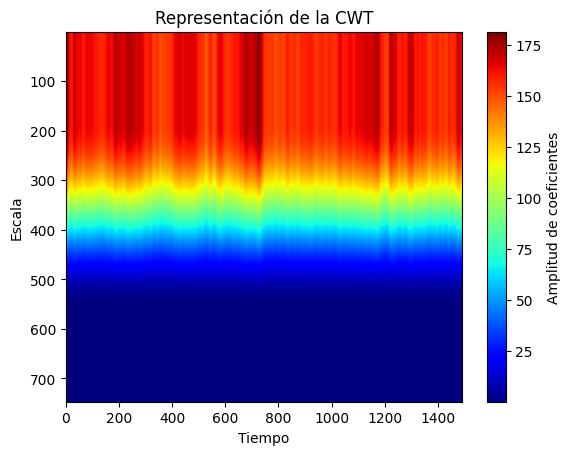

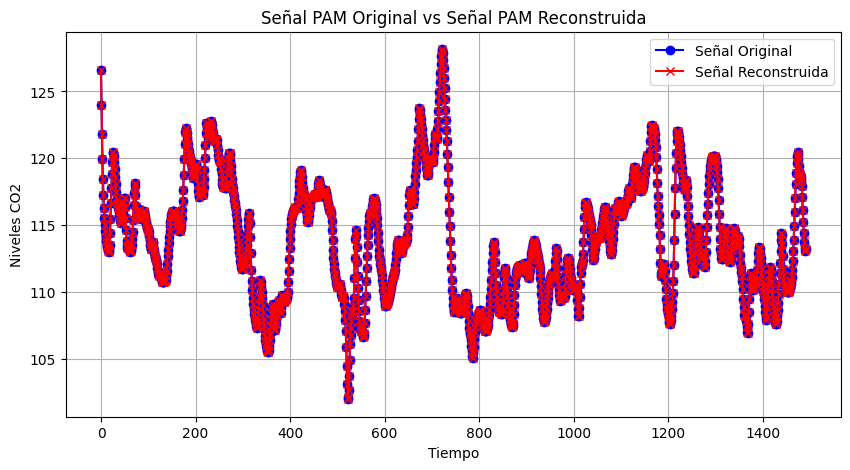

Error absoluto entre la señal original y la reconstruida: [1.42108547e-14 0.00000000e+00 0.00000000e+00 ... 1.42108547e-14
 0.00000000e+00 1.42108547e-14]
Error RMSE entre la señal original y la reconstruida: 1.70511206115227e-14


In [80]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

print(G1_PAM)

# Definir la familia de wavelets y el nivel de descomposicion
wavelet = 'db4'  # Wavelet de Haar (también conocida como db1)
level = 1  # Nivel de descomposición

# Aplicar la transformada wavelet discreta
# **Lo normal es primero tener el cA1 y luego el cD1, el coef de aproximacion suele ser parecido a la senal y esta primero**
coefficients = pywt.wavedec(G1_PAM, wavelet, level=level)

# Reconstruir la senal a partir de los coeficientes
reconstructed_signal = pywt.waverec(coefficients, wavelet)

# Calcular el error absoluto entre la señal original y la reconstruida
absolute_error = np.abs(G1_PAM - reconstructed_signal)

# Calcular el error cuadrático
squared_error = (G1_PAM - reconstructed_signal) ** 2

# Calcular la media del error cuadrático
mean_squared_error = np.mean(squared_error)

# Calcular la raíz cuadrada de la media del error cuadrático (RMSE)
rmse = np.sqrt(mean_squared_error)

# Visualizar la representacion de la CWT
plt.imshow(np.abs(coefficients), extent=[0, len(G1_PAM), scales[-1], scales[0]], cmap='jet', aspect='auto')
plt.colorbar(label='Amplitud de coeficientes')
plt.xlabel('Tiempo')
plt.ylabel('Escala')
plt.title('Representación de la CWT')
plt.show()


# Graficar ambas señales
plt.figure(figsize=(10, 5))
plt.plot(G1_PAM, label='Señal Original', color='blue', marker='o')
plt.plot(reconstructed_signal, label='Señal Reconstruida', color='red', marker='x')
plt.title('Señal PAM Original vs Señal PAM Reconstruida')
plt.ylabel('Niveles CO2')
plt.xlabel('Tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los errores
print("Error absoluto entre la señal original y la reconstruida:", absolute_error)
print("Error RMSE entre la señal original y la reconstruida:", rmse)


In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal de entrada
G1_PAM = np.array([2, 4, 6, 8, 10, 12, 14, 16])

# Definir la familia de wavelets y el nivel de descomposición
wavelet = 'db4'  # Wavelet de Daubechies-4
level = 2  # Nivel de descomposición

# Aplicar la transformada wavelet discreta
coefficients = pywt.wavedec(G1_PAM, wavelet, level=level)

# Asegurarse de que todos los conjuntos de coeficientes tengan la misma longitud rellenando con ceros
max_length = max(len(c) for c in coefficients)
coefficients_padded = [np.pad(c, (0, max_length - len(c)), 'constant') for c in coefficients]

# Reconstruir la señal a partir de los coeficientes
reconstructed_signal = pywt.waverec(coefficients, wavelet)

# Visualizar la representacion de la DWT
plt.imshow(np.abs(coefficients_padded), cmap='jet', aspect='auto')
plt.colorbar(label='Amplitud de coeficientes')
plt.xlabel('Nivel de Descomposición')
plt.ylabel('Índice de Coeficiente')
plt.title('Representación de la DWT')
plt.show()

# Graficar ambas señales
# Graficar ambas señales
plt.figure(figsize=(10, 5))
plt.plot(G1_PAM, label='Señal Original', color='blue', marker='o')
plt.plot(reconstructed_signal, label='Señal Reconstruida', color='red', marker='x', markersize=10, markevery=2)  # Ajustes de marcador
plt.title('Señal Original vs Señal Reconstruida')
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


# Imprimir los errores
absolute_error = np.abs(G1_PAM - reconstructed_signal)
squared_error = (G1_PAM - reconstructed_signal) ** 2
mean_squared_error = np.mean(squared_error)
rmse = np.sqrt(mean_squared_error)
print("Error absoluto entre la señal original y la reconstruida:", absolute_error)
print("Error RMSE entre la señal original y la reconstruida:", rmse)
